# How we increase model accuracy and some failed attempt.

This notebook will back log some of our effort and attempt that didn't make to the final project document because we want to keep the final project relatively clean. In this notebook, you can see failed attempt to increase accuracy as well as factors that lead us to decide one approach over another.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
data = pd.read_csv("train.csv")
originalData = data

### Should we get rid of outliers?

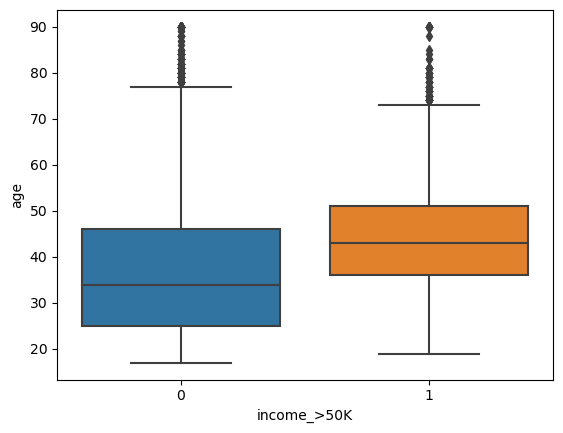

<AxesSubplot:xlabel='income_>50K', ylabel='fnlwgt'>

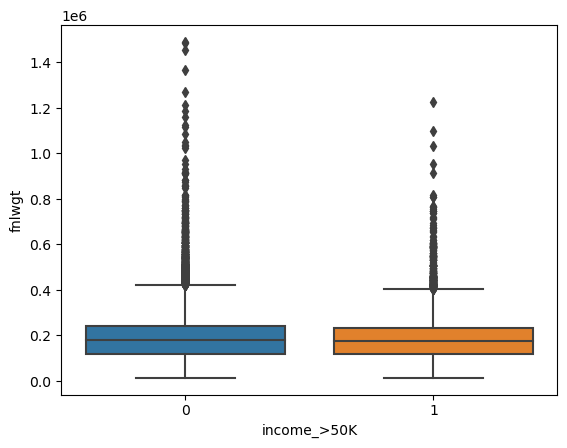

In [2]:
sns.boxplot(data = data, x='income_>50K', y='age')
plt.show()
sns.boxplot(data = data, x='income_>50K', y='fnlwgt')

When we anyalize the boxplot of fnlwgt, there was an attempt to remove the outliers for fnlwgt. There was an debate over whether or not to remove outliers. 

### In the code and the printed output, it used the term normalized, which is incorrect, it's just removed outliers vs not removing outliers for fnlwgt. But training the data takes 1 hour, we didn't want to rerun it, just to fix variable naming

In [12]:
# get rid of outlier is for fnlwgt is unnecessary it actually lower the model accuracy, 
# but an attempt was made, mention this in report if we don't have enough to write about

Q1 = data['fnlwgt'].quantile(0.25)
Q3 = data['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
normal = data[(data['fnlwgt'] > lower_bound) & (data['fnlwgt'] < upper_bound)]

In [4]:
columns_to_encode = ['education', 'workclass','native-country', 'marital-status', 'occupation', 'relationship', 'race', 'gender']
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_columns = encoder.fit_transform(data[columns_to_encode])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))
data.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
df_encoded = pd.concat([data.drop(columns=columns_to_encode), encoded_df], axis=1)

ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(df_encoded.drop(columns=['income_>50K']), df_encoded['income_>50K'])
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.1, random_state=14)

scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

# -------------------- for normalized data -------------------------
columns_to_encode = ['education', 'workclass','native-country', 'marital-status', 'occupation', 'relationship', 'race', 'gender']
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_columns = encoder.fit_transform(normal[columns_to_encode])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))
normal.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
df_encoded = pd.concat([normal.drop(columns=columns_to_encode), encoded_df], axis=1)

ros = RandomOverSampler()
n_x_ros, n_y_ros = ros.fit_resample(df_encoded.drop(columns=['income_>50K']), df_encoded['income_>50K'])
n_x_train, n_x_test, n_y_train, n_y_test = train_test_split(n_x_ros, n_y_ros, test_size=0.1, random_state=14)

scaler = StandardScaler()
normal_scaled_x_train = scaler.fit_transform(n_x_train)
normal_scaled_x_test = scaler.transform(n_x_test)

In [7]:
logistic = LogisticRegression(max_iter=1000)
normalized = []
unnormalized = []
i = 1
while i < 20 :
    ros = RandomOverSampler()
    x_ros, y_ros = ros.fit_resample(df_encoded.drop(columns=['income_>50K']), df_encoded['income_>50K'])
    x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.1, random_state=i)

    scaler = StandardScaler()
    scaled_x_train = scaler.fit_transform(x_train)
    scaled_x_test = scaler.transform(x_test)

    logistic.fit(scaled_x_train, y_train)
    pred = logistic.predict(scaled_x_test)
    accuracy = accuracy_score(y_test, pred)
    unnormalized.append(accuracy)
    #-------------------------
    ros = RandomOverSampler()
    n_x_ros, n_y_ros = ros.fit_resample(df_encoded.drop(columns=['income_>50K']), df_encoded['income_>50K'])
    n_x_train, n_x_test, n_y_train, n_y_test = train_test_split(n_x_ros, n_y_ros, test_size=0.1, random_state=i)

    scaler = StandardScaler()
    normal_scaled_x_train = scaler.fit_transform(n_x_train)
    normal_scaled_x_test = scaler.transform(n_x_test)
    #---------------------------

    logistic.fit(normal_scaled_x_train, n_y_train)
    pred = logistic.predict(normal_scaled_x_test)
    accuracy = accuracy_score(n_y_test, pred)
    normalized.append(accuracy)
    i = i+1
print("Accuracy of unnormalized data:", np.mean(unnormalized))
print("Accuracy of normalized data:", np.mean(normalized))

Accuracy of unnormalized data: 0.8211712333774706
Accuracy of normalized data: 0.8210981226797508


In [8]:
print(unnormalized, normalized)

[0.8238925760148171, 0.8231208519833307, 0.8235838864022226, 0.8070689921284149, 0.8235838864022226, 0.8218860935329526, 0.8268251273344652, 0.8269794721407625, 0.81694705973144, 0.8201883006636826, 0.8220404383392499, 0.8229665071770335, 0.820960024695169, 0.8152492668621701, 0.8152492668621701, 0.8303750578793023, 0.8195709214384936, 0.8223491279518444, 0.8194165766321964] [0.8268251273344652, 0.8245099552400061, 0.8167927149251427, 0.8167927149251427, 0.8198796110510881, 0.8200339558573854, 0.818027473375521, 0.8283685753974379, 0.820960024695169, 0.8192622318258991, 0.8212687143077635, 0.8279055409785461, 0.8246643000463034, 0.8164840253125483, 0.8120080259299275, 0.8246643000463034, 0.8191078870196018, 0.8214230591140608, 0.8218860935329526]


For logistic regression, model trained on normalized fnlwgt has less accuracy

In [10]:
RFC = RandomForestClassifier(criterion = "gini",n_estimators=150, max_features=5)  
normalized = []
unnormalized = []
i = 1
while i < 20 :
    ros = RandomOverSampler()
    x_ros, y_ros = ros.fit_resample(df_encoded.drop(columns=['income_>50K']), df_encoded['income_>50K'])
    x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.1, random_state=i)

    scaler = StandardScaler()
    scaled_x_train = scaler.fit_transform(x_train)
    scaled_x_test = scaler.transform(x_test)

    RFC.fit(scaled_x_train, y_train)
    pred = RFC.predict(scaled_x_test)
    accuracy = accuracy_score(y_test, pred)
    unnormalized.append(accuracy)
    #-------------------------
    ros = RandomOverSampler()
    n_x_ros, n_y_ros = ros.fit_resample(df_encoded.drop(columns=['income_>50K']), df_encoded['income_>50K'])
    n_x_train, n_x_test, n_y_train, n_y_test = train_test_split(n_x_ros, n_y_ros, test_size=0.1, random_state=i)

    scaler = StandardScaler()
    normal_scaled_x_train = scaler.fit_transform(n_x_train)
    normal_scaled_x_test = scaler.transform(n_x_test)
    #---------------------------

    RFC.fit(normal_scaled_x_train, n_y_train)
    pred = RFC.predict(normal_scaled_x_test)
    accuracy = accuracy_score(n_y_test, pred)
    normalized.append(accuracy)
    i = i+1
print("Accuracy of unnormalized data:", np.mean(unnormalized))
print("Accuracy of normalized data:", np.mean(normalized))

Accuracy of unnormalized data: 0.9349883429054191
Accuracy of normalized data: 0.9349802194945616


Since both logistic regression and random forest tree model shows that unnormalized fnlwgt data trains with higher accruacy, although by aninsignificantly tiny margin we still decide to go with unnormalized data to be safe.

### Why didn't our random forest used standardScaled data

In [20]:
data = pd.read_csv("train.csv")
data = data.copy().loc[(data['native-country'] == 'United-States'), :]
#Then we drop the country constrains
data.drop(columns=['native-country'],inplace=True)
columns_to_encode = ['education', 'workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender']
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_columns = encoder.fit_transform(data[columns_to_encode])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))
data.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
df_encoded = pd.concat([data.drop(columns=columns_to_encode), encoded_df], axis=1)

In [21]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(df_encoded.drop(columns=['income_>50K']), df_encoded['income_>50K'])
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.1, random_state=101)

x_rus, y_rus = rus.fit_resample(df_encoded.drop(columns=['income_>50K']), df_encoded['income_>50K'])
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_rus, y_rus, test_size=0.1, random_state=101)
print("data size from random over sampler")
print(y_train.value_counts(normalize= False))
print("data size from random under sampler")
print(y_train2.value_counts(normalize= False))

data size from random over sampler
0    26876
1    26742
Name: income_>50K, dtype: int64
data size from random under sampler
1    8679
0    8674
Name: income_>50K, dtype: int64


In [22]:
model = RandomForestClassifier()
RFC = RandomForestClassifier(criterion = "gini",n_estimators=150, max_features=5)  
RFC.fit(x_train, y_train)
pred = RFC.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print("accuracy from random over sampler:", accuracy)
RFC.fit(x_train2, y_train2)
pred = RFC.predict(x_test2)
accuracy = accuracy_score(y_test2, pred)
print("accuracy form random under sampler:", accuracy)

accuracy from random over sampler: 0.93689157435381
accuracy form random under sampler: 0.815966822187662


At first we thought we should use random under sampler to train our model because it has smaller smaple size and would make the training quicker, but when we test it on random forest model the random over sampler result won by a large margin of 10%

### Why didn't we use standard scaled data for random forest in the end

In [23]:
data = pd.read_csv("train.csv")
data = data.copy().loc[(data['native-country'] == 'United-States'), :]
#Then we drop the country constrains
data.drop(columns=['native-country'],inplace=True)
columns_to_encode = ['education', 'workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender']
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_columns = encoder.fit_transform(data[columns_to_encode])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))
data.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
df_encoded = pd.concat([data.drop(columns=columns_to_encode), encoded_df], axis=1)
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(df_encoded.drop(columns=['income_>50K']), df_encoded['income_>50K'])


In [24]:
#scale the data, need to do after encoding
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [31]:
RFC = RandomForestClassifier(criterion = "gini",n_estimators=150, max_features=20)  
scale=[]
no_scale=[]
i = 0
while i < 5:
    x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.1, random_state=i+50)
    scaler = StandardScaler()
    scaled_x_train = scaler.fit_transform(x_train)
    scaled_x_test = scaler.transform(x_test)
    RFC.fit(x_train, y_train)
    pred = RFC.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    no_scale.append(accuracy)
    RFC.fit(scaled_x_train , y_train)
    pred = RFC.predict(scaled_x_test )
    accuracy = accuracy_score(y_test, pred)
    scale.append(accuracy)
    i = i+1
print("accuracy with none standardscaled data:", np.mean(no_scale))
print("accuracy with standardscaled data:", np.mean(scale))

accuracy with none standardscaled data: 0.9377979187646861
accuracy with standardscaled data: 0.9376636455186305


We found out that usingthe none standardscaled data worked better although with small margin, that's why in the final version of the project we train our random forest without standardscaled data. We used standardscale in the first place because we see capital gain and capital loss data varies in great range and also lots input attributes are measured in different unit such as age and wage.

### In conclusion, we found that a lot of method in theory such as standardization and rescaling data would improve our model, but when we do some prototyping in practice it didn't really help as much, the difference are often insignificantly small, some even decrease the accuracy by a tiny bit. The only one what made significant improvement is using RandomOverSampler over the RandomUnderSampler